In [1]:
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
b_data = []
for b in range(1, 6):
    file_path = "./building_"+str(b)+".csv"
    b_data.append(pd.read_csv(file_path))

In [3]:
w_data = []
for b in range(1, 6):
    file_path = "./weather_"+str(b)+".csv"
    w_data.append(pd.read_csv(file_path))

In [4]:
b_data[0]

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.811782,0.0,0.0,0.0,0.000000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.102542,0.0,0.0,0.0,0.000000
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.099774,0.0,0.0,0.0,0.000000
3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.099595,0.0,0.0,0.0,0.000000
4,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.092918,0.0,0.0,0.0,0.000000
5,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.111308,0.0,0.0,0.0,0.000000
6,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.299917,0.0,0.0,0.0,21.315836
7,1.0,7.0,0.0,0.0,0.0,0.0,0.0,1.307118,0.0,0.0,0.0,104.173152
8,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1.308366,0.0,0.0,0.0,258.124408
9,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.315768,0.0,0.0,0.0,457.436849


In [5]:
ac_efficiency = [1, 1.2, 2.1, 0.9, 0.8]
solar_intercept = [3, 4, 5, 3.5, 2.5]
solar_efficiency = [1, 1.2, 0.5, 0.8, 1.2]#[3, 5, 2, 2.5, 5]
solar_panel = [0.6, 0.5, 0.5, 0.9, 0.6]

In [40]:
def draw_graph(b1, b2, index):

    temp_train = []
    temp_test = []
    hum_train = []
    hum_test = []
    for temp_random in np.linspace(15, 20, 100):
        temp_train.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for temp_random in np.linspace(25, 30, 100):
        temp_test.append(w_data[b2]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for hum_random in np.linspace(20, 40, 100):
        hum_train.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    for hum_random in np.linspace(50, 70, 100):
        hum_test.append(w_data[b2]["Relative Humidity [%]"] + hum_random)
    temp_train = np.array(temp_train)
    temp_test = np.array(temp_test)
    hum_train = np.array(hum_train)
    hum_test = np.array(hum_test)

    solar_train_base = np.array(b_data[b1]["Solar Generation [W/kW]"])
    solar_test_base = np.array(b_data[b2]["Solar Generation [W/kW]"])
    demand_train_base = np.array(b_data[b1]["Equipment Electric Power [kWh]"])
    demand_test_base = np.array(b_data[b2]["Equipment Electric Power [kWh]"])

    plot_demand_train = []
    plot_demand_test = []
    day = np.array(list(range(0, 24)))
    if index == -1:     # solar
        # for temp_random in np.linspace(0, 20, 100):
        #     plot_demand_train.append((b_data[b1]["Solar Generation [W/kW]"]*i)/1000)
        # for j in np.linspace(4.0, 4.1, 100):
        #     plot_demand_test.append((b_data[b2]["Solar Generation [W/kW]"]*j)/1000)
        plot_demand_train = (temp_train*solar_efficiency[b1]*solar_panel[b1]**2) * solar_train_base / 1000
        plot_demand_test = (temp_test*solar_efficiency[b2]*solar_panel[b2]**2) * solar_test_base / 1000
    else:               # non shiftable demand
        # for i in np.linspace(0.1, 1, 100):
        #     plot_demand_train.append(b_data[b1]["Equipment Electric Power [kWh]"]+i)
        # for j in np.linspace(0, 0.1, 100):
        #     plot_demand_test.append(b_data[b2]["Equipment Electric Power [kWh]"]+j)
        plot_demand_train = (hum_train-60)/20/ac_efficiency[b1] + (30-temp_train)/25/ac_efficiency[b1] + demand_train_base
        plot_demand_test = (hum_test-60)/20/ac_efficiency[b2] + (30-temp_test)/25/ac_efficiency[b2] + demand_test_base

    plot_demand_train = np.array(plot_demand_train)
    plot_demand_test = np.array(plot_demand_test)

    for i in range(len(plot_demand_train)):
        plt.plot(day, plot_demand_train[i], 'r.')
        # print(plot_demand_train[i-4])
    for i in range(len(plot_demand_test)):
        plt.plot(day, plot_demand_test[i], 'b.')
    plt.title("train_"+str(b1+1)+"_test_"+str(b2+1))
    plt.show()

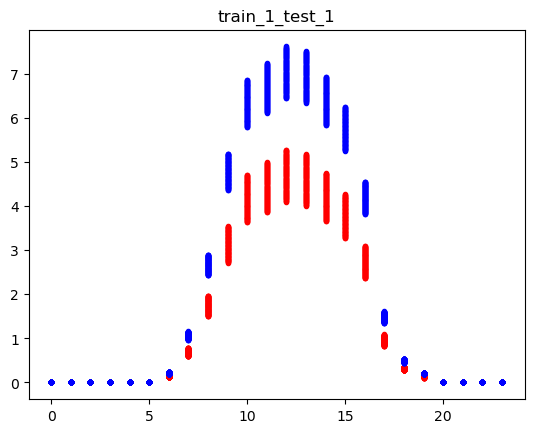

In [47]:
for i in range(1):
    for j in range(1):
        draw_graph(i, j, -1)    # solar generation

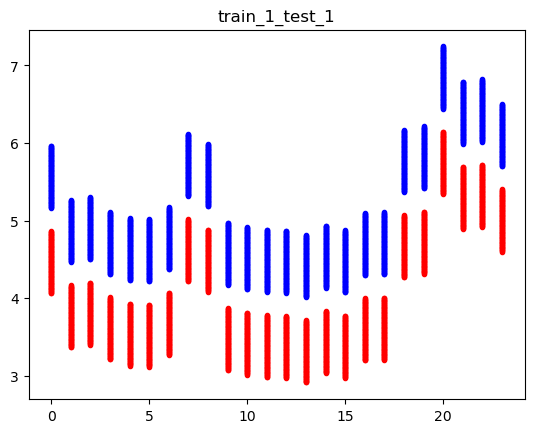

In [48]:
for i in range(1):
    for j in range(1):
        draw_graph(i, j, -5)    # demand

In [72]:
def draw_solar_demand(b1):

    temp_train = []
    temp_test = []
    hum_train = []
    hum_test = []
    for temp_random in np.linspace(15, 20, 100):
        temp_train.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for temp_random in np.linspace(25, 30, 100):
        temp_test.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for hum_random in np.linspace(20, 40, 100):
        hum_train.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    for hum_random in np.linspace(50, 70, 100):
        hum_test.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    temp_train = np.array(temp_train)
    temp_test = np.array(temp_test)
    hum_train = np.array(hum_train)
    hum_test = np.array(hum_test)

    solar_train_base = np.array(b_data[b1]["Solar Generation [W/kW]"])
    solar_test_base = np.array(b_data[b1]["Solar Generation [W/kW]"])
    demand_train_base = np.array(b_data[b1]["Equipment Electric Power [kWh]"])
    demand_test_base = np.array(b_data[b1]["Equipment Electric Power [kWh]"])

    plot_solar_train = (1+temp_train*solar_efficiency[b1]*solar_panel[b1]**2/40)  \
                                    *solar_train_base / 1000
    plot_solar_test =  (1+temp_test*solar_efficiency[b1]*solar_panel[b1]**2/40) \
                                * solar_test_base / 1000

    plot_demand_train = ((hum_train-60)/20/ac_efficiency[b1] + (30-temp_train)/25/ac_efficiency[b1])*0.5 + demand_train_base
    plot_demand_test = ((hum_test-60)/20/ac_efficiency[b1] + (30-temp_test)/25/ac_efficiency[b1])*0.5 + demand_test_base

    day = np.array(list(range(0, 24)))

    for i in range(len(plot_demand_train)):
        plt.plot(day, plot_demand_train[i], 'b--')
        # print(plot_demand_train[i-4])
    for i in range(len(plot_demand_test)):
        plt.plot(day, plot_demand_test[i], 'r--')


    plt.title("train_and_test"+str(b1+1)+" demand ")
    plt.show()

    for i in range(len(plot_solar_train)):
        plt.plot(day, plot_solar_train[i], 'b-')
    for i in range(len(plot_solar_test)):
        plt.plot(day, plot_solar_test[i], 'r--')
    plt.title("train_and_test"+str(b1+1)+" solar ")
    plt.show()

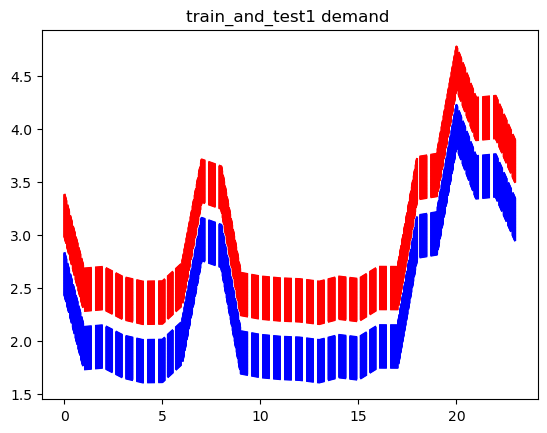

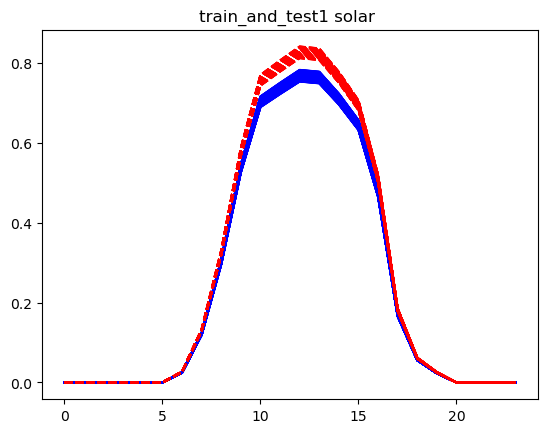

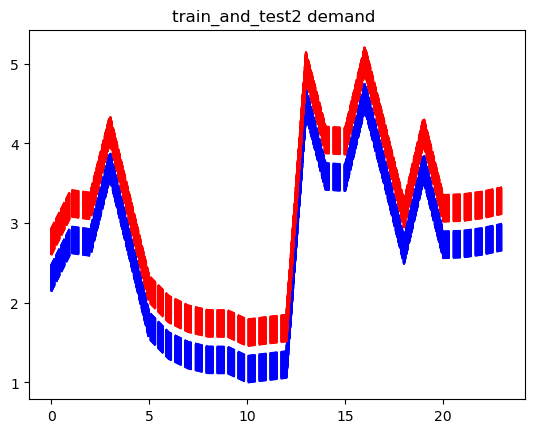

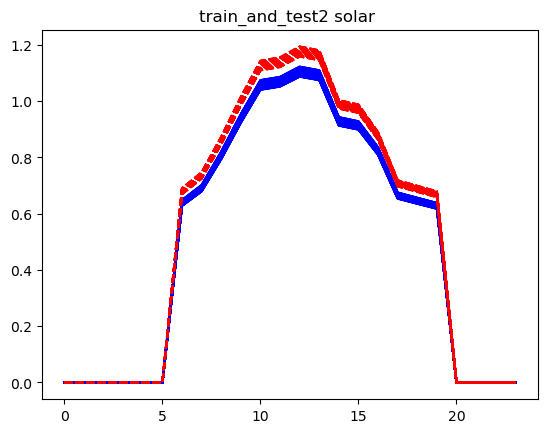

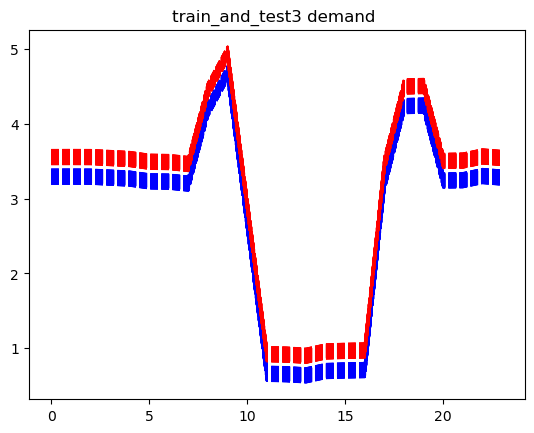

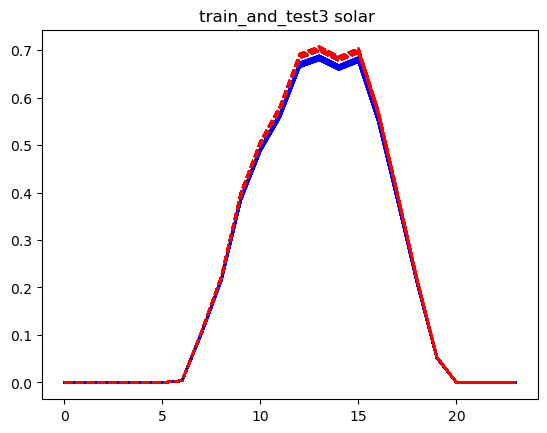

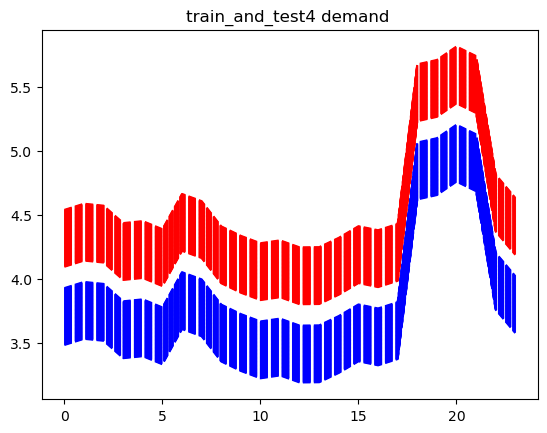

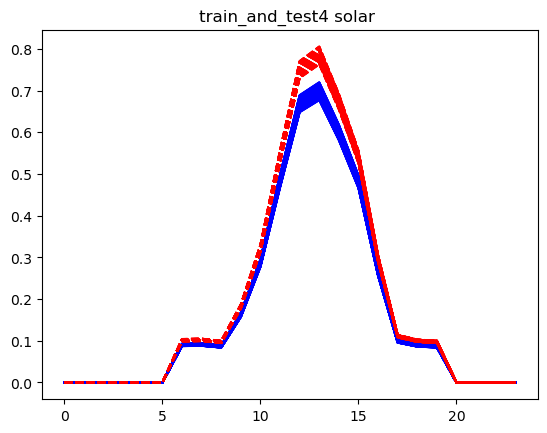

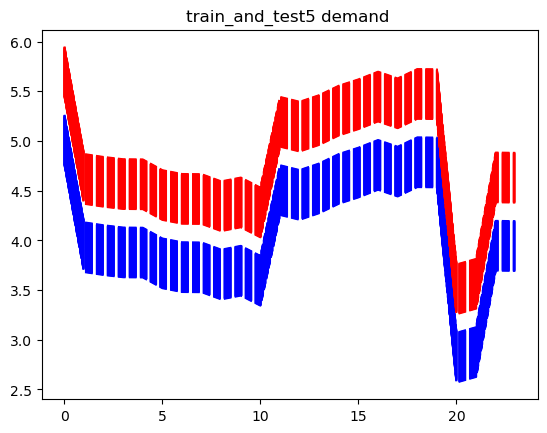

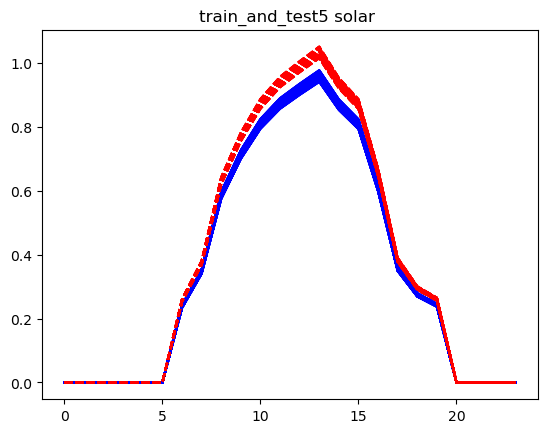

In [74]:
for i in range(5):
    draw_solar_demand(i)

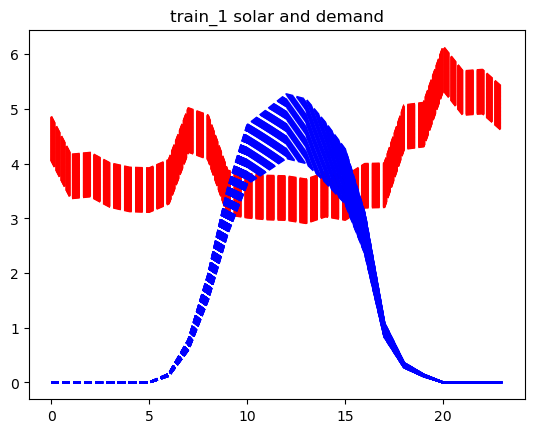

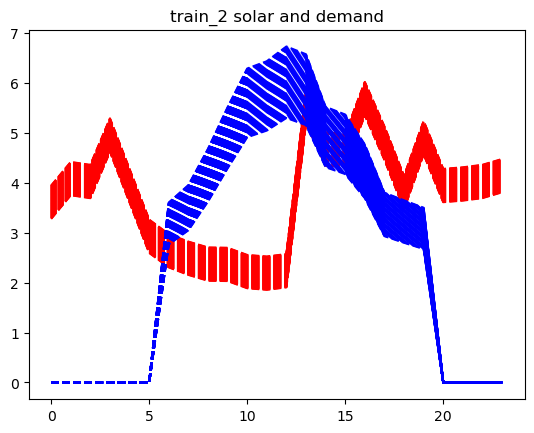

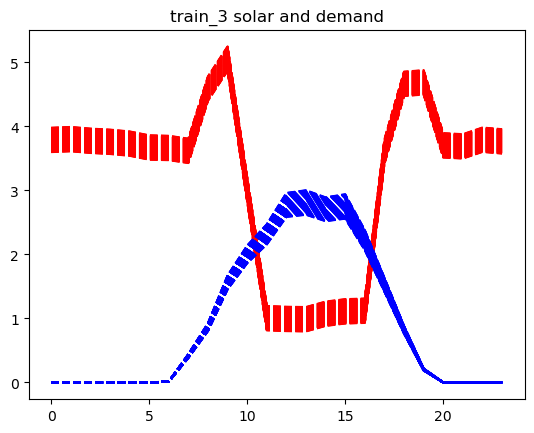

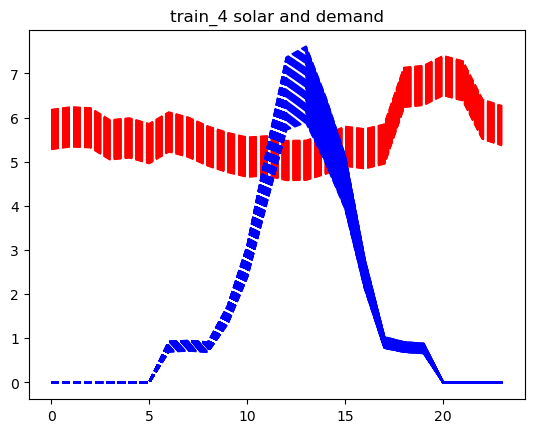

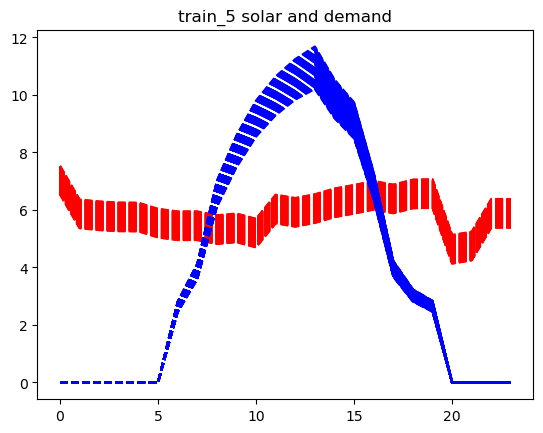

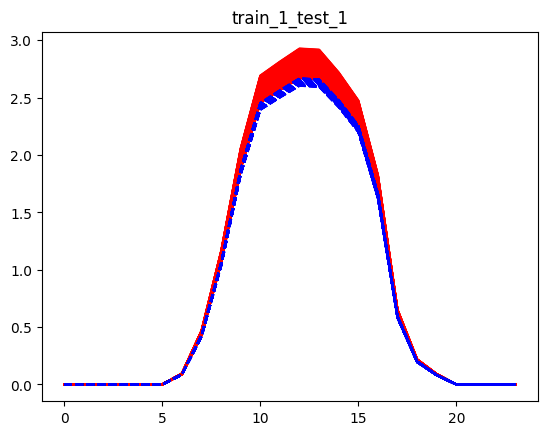

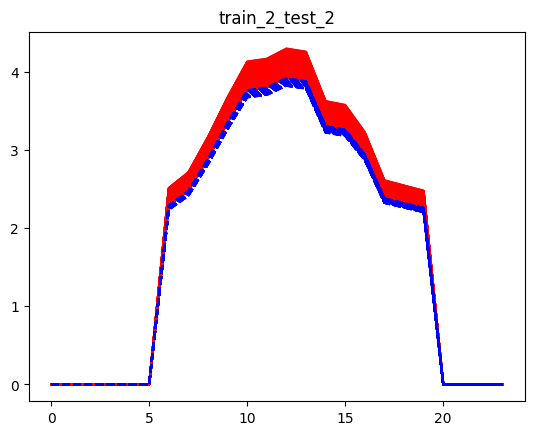

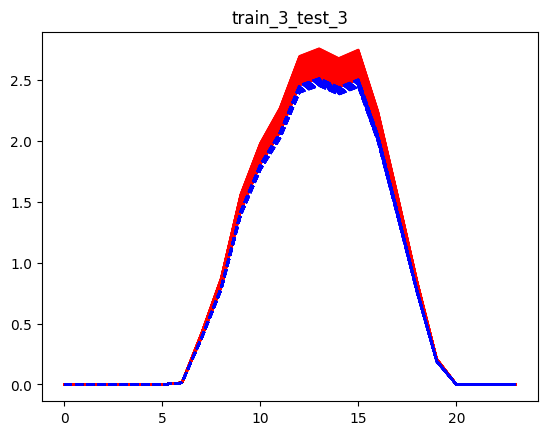

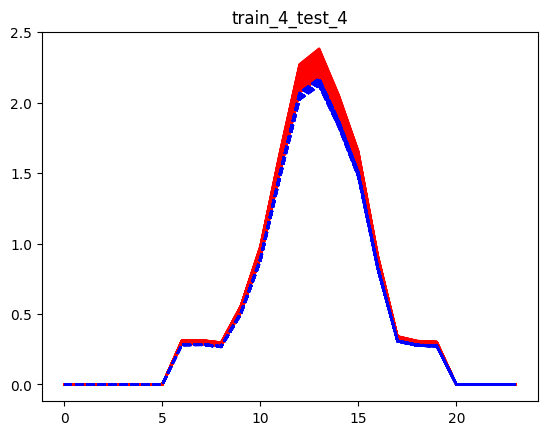

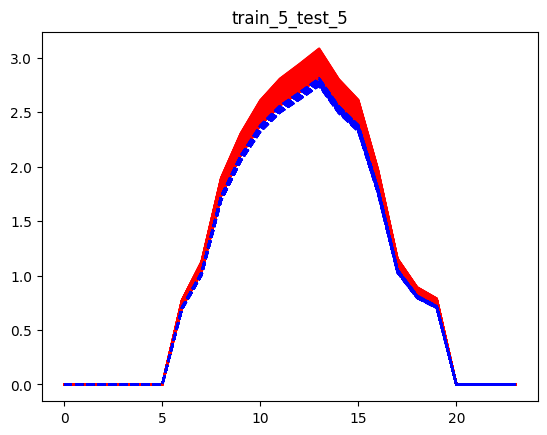

In [4]:
for i in range(5):
    draw_graph(i, i, -1)

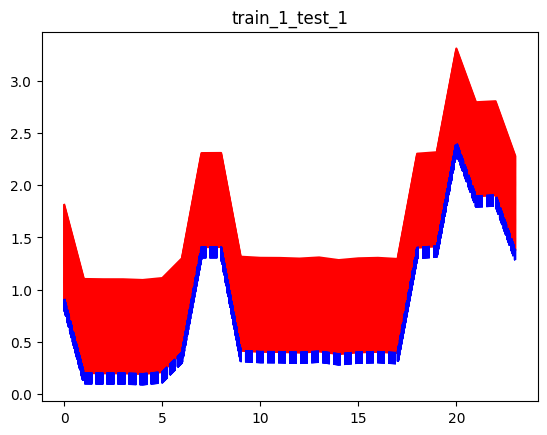

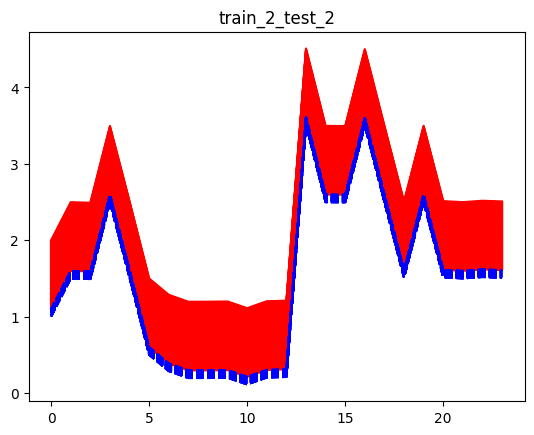

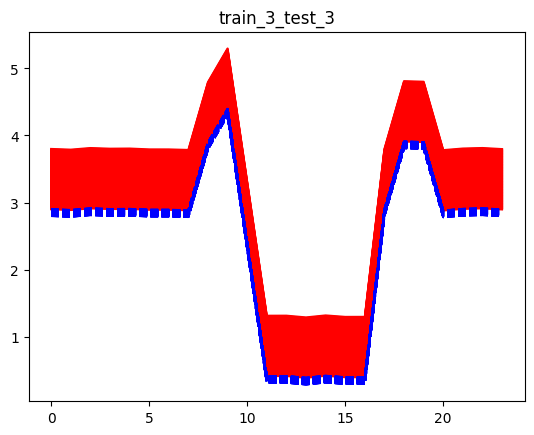

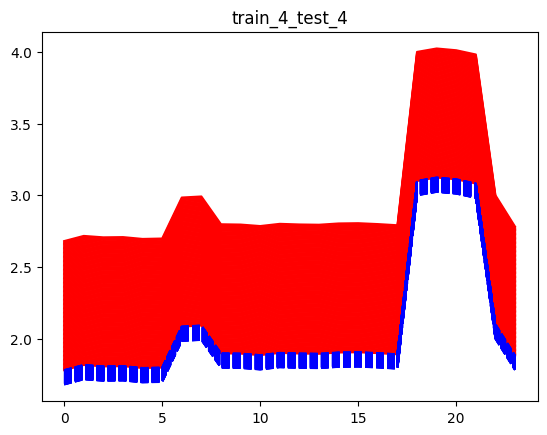

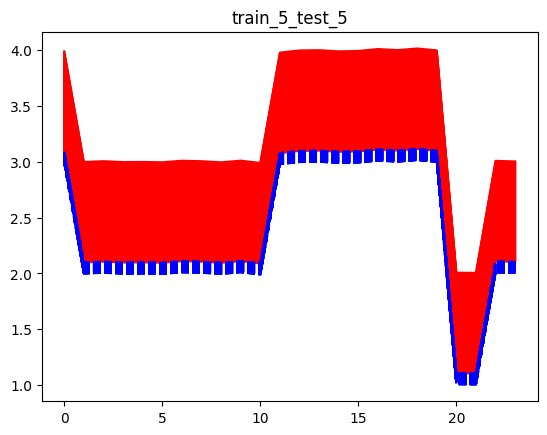

In [5]:
for i in range(5):
    draw_graph(i, i, -5)